## Iris Data set Analysis

Problem statement: Predict the class of flower by its chracteristics like sepal-length,petal-width etc.

In [7]:
# Load libraries
import pandas
from pandas.plotting import scatter_matrix
import warnings
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

In [8]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [9]:
# shape
print(dataset.shape)

(150, 5)


In [10]:
# head
print(dataset.head(30))

    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0          3.6           1.4          0.2  Iris-setosa
5            5.4          3.9           1.7          0.4  Iris-setosa
6            4.6          3.4           1.4          0.3  Iris-setosa
7            5.0          3.4           1.5          0.2  Iris-setosa
8            4.4          2.9           1.4          0.2  Iris-setosa
9            4.9          3.1           1.5          0.1  Iris-setosa
10           5.4          3.7           1.5          0.2  Iris-setosa
11           4.8          3.4           1.6          0.2  Iris-setosa
12           4.8          3.0           1.4          0.1  Iris-setosa
13           4.3    

In [11]:
# class distribution
print(dataset.groupby('class').size())

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


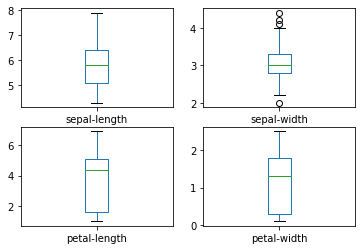

In [12]:
# Univariate plots to better understand each attribute
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

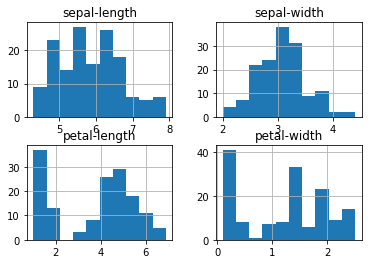

In [13]:
# histograms
dataset.hist()
plt.show()
# It looks like perhaps two of the input variables have a Gaussian distribution. 
#This is useful to note as we can use algorithms 
#that can exploit this assumption.

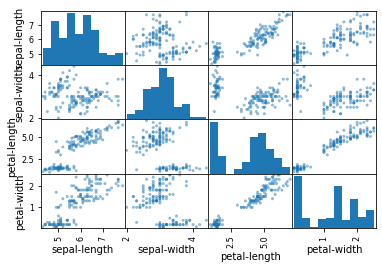

In [14]:
# Multivariate plots to better understand the relationships between attributes.
# scatter plot matrix
scatter_matrix(dataset)
plt.show()
#The diagonal grouping of some pairs of attributes. This suggests a high correlation and a predictable relationship.

# Create a Validation Dataset

In [15]:
#We will split the loaded dataset into two, 80% of which we will use to train our models and 
#20% that we will hold back as a validation dataset.
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)


In [16]:
X_train

array([[6.2, 2.8, 4.8, 1.8],
       [5.7, 2.6, 3.5, 1.0],
       [4.6, 3.6, 1.0, 0.2],
       [6.9, 3.1, 5.4, 2.1],
       [6.4, 2.9, 4.3, 1.3],
       [4.8, 3.0, 1.4, 0.3],
       [5.5, 3.5, 1.3, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [7.1, 3.0, 5.9, 2.1],
       [6.7, 3.3, 5.7, 2.1],
       [6.8, 2.8, 4.8, 1.4],
       [6.4, 2.8, 5.6, 2.2],
       [6.5, 3.0, 5.5, 1.8],
       [5.7, 3.0, 4.2, 1.2],
       [5.0, 3.3, 1.4, 0.2],
       [6.7, 3.1, 4.4, 1.4],
       [6.0, 2.2, 4.0, 1.0],
       [6.4, 2.7, 5.3, 1.9],
       [4.7, 3.2, 1.6, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.1, 3.4, 1.5, 0.2],
       [7.7, 3.8, 6.7, 2.2],
       [4.3, 3.0, 1.1, 0.1],
       [6.3, 3.3, 6.0, 2.5],
       [5.5, 2.4, 3.7, 1.0],
       [5.0, 2.0, 3.5, 1.0],
       [6.5, 2.8, 4.6, 1.5],
       [5.0, 3.4, 1.6, 0.4],
       [4.4, 2.9, 1.4, 0.2],
       [5.0, 3.5, 1.6, 0.6],
       [6.7, 3.1, 4.7, 1.5],
       [7.3, 2.9, 6.3, 1.8],
       [5.5, 2.6, 4.4, 1.2],
       [5.2, 2

In [17]:
print (len(Y_train),len(Y_validation))
#so our training and validation set is ready with 80:20 ratio

120 30


In [18]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'
#We will use 10-fold cross validation to estimate accuracy.
#This will split our dataset into 10 parts, train on 9 and test on 1 
#and repeat for all combinations of train-test splits.

# Build Models

In [19]:
# we will evaluate using  6 different algorithms.
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)#here e use kfold validation for scoring
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)#apply dataset on train data
    results.append(cv_results)
    names.append(name)
    #here we are using supervised method as we are giving what could be the result to given characteristics
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    #here we can see  KNN has the largest estimated accuracy score.

LR: nan (nan)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.983333 (0.033333)


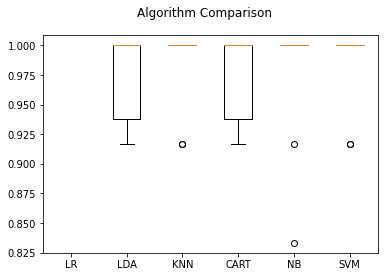

In [20]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()
# The box and whisker plots are squashed at the top of the range, with many samples achieving 100% accuracy

#  Make Predictions

In [21]:
# Make predictions on validation dataset
# Here we apply our built model on test data set so to see that our model does not overfit and it gives an
# idea whether our model is appropiate for prediction on other datasets
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

       accuracy                           0.90        30
      macro avg       0.92      0.91      0.91        30
   weighted avg       0.90      0.90      0.90        30



### Conclusion 
***We can see that the accuracy is 0.9 or 90%. The confusion matrix provides an indication of the three errors made. Finally, the classification report provides a breakdown of each class by precision, recall, f1-score and support showing excellent results.***